# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modules
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\Datasets\covid_19_data.csv")

# Display basic information about the dataset
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [2]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [4]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

# 2. Data Cleaning:

In [5]:

df.info()
df.describe()

# Handle missing values
df.isnull().sum()
categorical=[]
continuous=[]

for i in df.columns:
    if df[i].dtype=="object":
        categorical.append(i)
    else:
        continuous.append(i)



# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
Number of duplicates: 0


In [6]:
continuous

['SNo', 'Confirmed', 'Deaths', 'Recovered']

In [7]:
categorical

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

# 3. Descriptive Statistics:

In [8]:
# Descriptive statistics (Generate descriptive statistics (mean, median, min, max) for numeric columns)
df['Deaths'].mean()

2036.4032679674574

In [9]:
df['Country/Region'].mode()

0    Russia
Name: Country/Region, dtype: object

In [10]:
# fill up missing values fillna()

for i in df:
    if df[i].dtypes=="object":
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        me=df[i].mean()
        df[i]=df[i].fillna(me)

In [11]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# 4. Time Series Analysis:

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

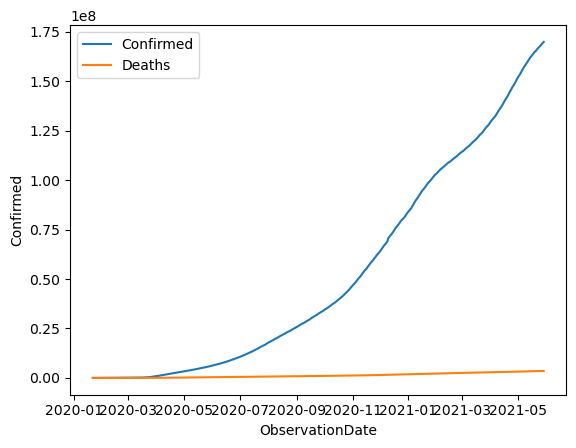

In [23]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data using line plot
import seaborn as sns
import matplotlib.pyplot as plt
# syntax: 
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')


C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ObservationDate', ylabel='Deaths'>

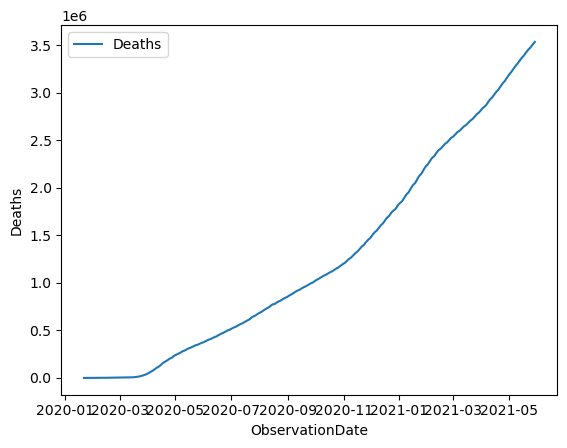

In [24]:
sns.lineplot(data=df_time, x="ObservationDate", y="Deaths", label="Deaths")

# 5. Geographical Analysis:

<Axes: xlabel='Country/Region', ylabel='Confirmed'>

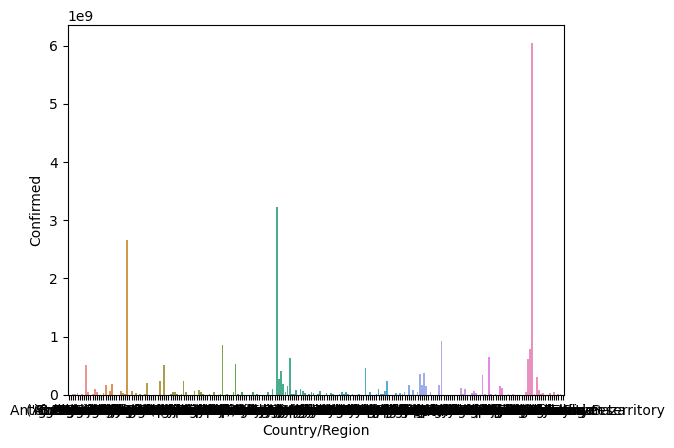

In [13]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_country

# Plot geographical data
sns.barplot(x= df_country.index, y='Confirmed', data=df_country)

# 6. Correlation Analysis:

In [14]:

df['Country/Region'].value_counts()
# crosstab
pd.crosstab(df['Country/Region'],df['Last Update'])


Last Update,1/22/2020 17:00,1/23/20 17:00,1/24/20 17:00,1/25/20 17:00,1/26/20 16:00,1/27/20 23:59,1/28/20 23:00,1/29/20 19:30,1/30/20 16:00,1/31/2020 10:37,...,2021-05-25 04:21:08,2021-05-26 04:20:35,2021-05-27 04:20:59,2021-05-28 04:20:36,2021-05-29 04:20:41,2021-05-30 04:20:55,3/8/20 5:31,4/2/20 8:53,4/4/20 9:38,4/6/20 9:37
Country/Region,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('St. Martin',)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,4,1,1,1
Albania,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,4,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,3,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
Zambia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,4,1,1,1


In [15]:
df['Province/State'].value_counts()

Province/State
Unknown                         82226
Amazonas                         1109
Diamond Princess cruise ship      924
Grand Princess                    882
Punjab                            708
                                ...  
Harrison County, KY                 1
Queens County, NY                   1
Johnson County, IA                  1
Unassigned Location, VT             1
Charlotte County, FL                1
Name: count, Length: 736, dtype: int64

In [16]:
ct=pd.crosstab(df['Province/State'],df['Country/Region'])
ct

Country/Region,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Province/State,,,,,,,,,,,,,,,,,,,,,
"Montreal, QC",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Norfolk County, MA",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abruzzo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adygea Republic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaporizhia Oblast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zeeland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zhejiang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

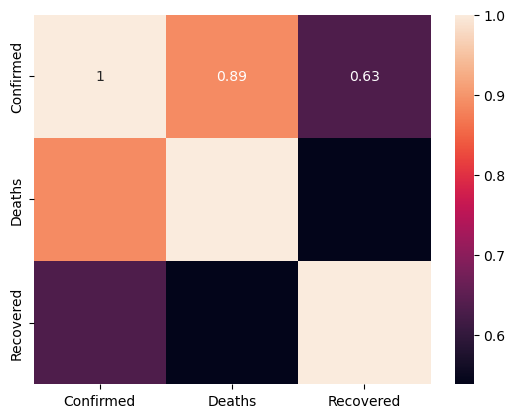

In [25]:
# Correlation analysis between confirmed,deaths and recovered
# Plot correlation on heat map
df.columns
c = df[["Confirmed", "Deaths", "Recovered"]].corr()
sns.heatmap(c, annot=True)

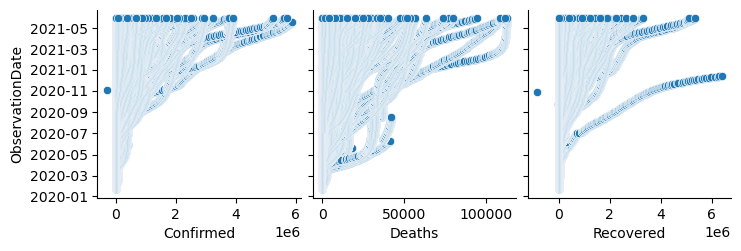

In [18]:
# Correlation analysis between confirmed,deaths and recovered

sns.pairplot(df,x_vars=['Confirmed','Deaths','Recovered'],y_vars=['ObservationDate'])


# 7. Advanced Analysis:

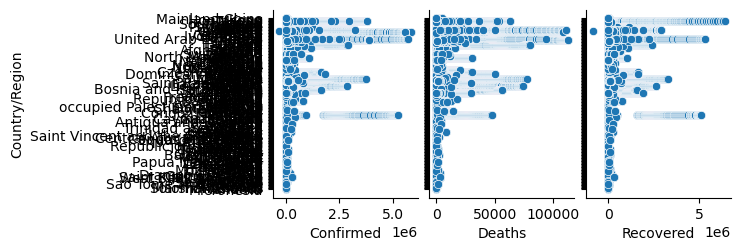

In [28]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
sns.pairplot(df,x_vars=['Confirmed','Deaths','Recovered'],y_vars=['Country/Region'])


In [31]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
a = df.sort_values(by="Confirmed", ascending = False)
high_conf = a.head(1)
b = df.sort_values(by="Recovered", ascending = False)
high_conf = b.head(1)
c = df.sort_values(by="Deaths", ascending = False)
high_conf = c.head(1)
print(a, b, c)

           SNo ObservationDate Province/State  Country/Region  \
298068  298069      2021-05-19        Unknown          France   
297303  297304      2021-05-18        Unknown          France   
296538  296539      2021-05-17        Unknown          France   
295773  295774      2021-05-16        Unknown          France   
295008  295009      2021-05-15        Unknown          France   
...        ...             ...            ...             ...   
257404  257405      2021-03-26        Unknown        Colombia   
257406  257407      2021-03-26        Unknown           India   
257408  257409      2021-03-26        Unknown  Mainland China   
257409  257410      2021-03-26        Unknown          Mexico   
147524  147525      2020-11-02        Unknown        Colombia   

                Last Update  Confirmed    Deaths  Recovered  
298068  2021-05-20 04:21:05  5863138.0  107390.0   324444.0  
297303  2021-05-19 04:20:42  5845010.0  107256.0   323205.0  
296538  2021-05-18 04:20:33  5829

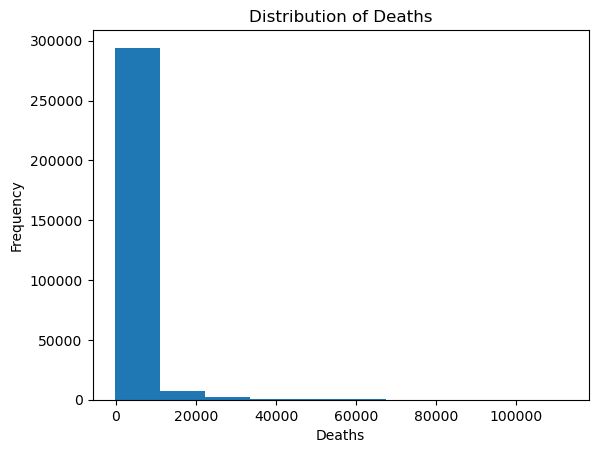

In [32]:
# Visualize the distribution of deaths using bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df["Deaths"], bins=10)
plt.ylabel("Frequency")
plt.xlabel("Deaths")
plt.title("Distribution of Deaths")
plt.show()

<Axes: ylabel='Frequency'>

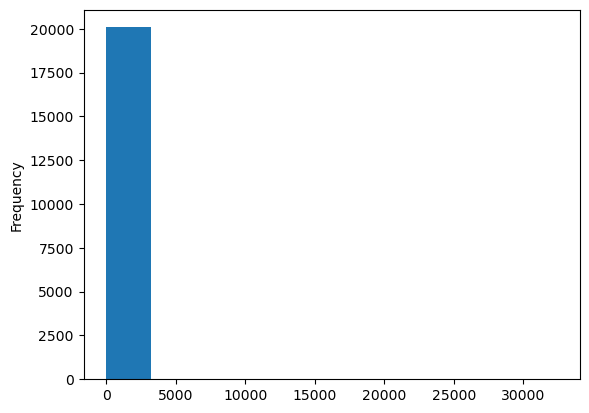

In [35]:
df["Deaths"].value_counts().plot(kind="hist")